# Notes #
1. Data preparation
    + 


**Rough notes**  
1. 

---

**Data preparation**

In [1]:
# Data preparation #

# Load CSV using Pandas
import pandas as pd
import numpy as np

X = pd.read_csv("../data/testData1_features.csv", delimiter=",", header=None, index_col=False)
Y = pd.read_csv("../data/testData1_target.csv", delimiter=",", header=None, index_col=False)
X = X.iloc[1:,1:]
Y = Y.iloc[1:,1:]

print("Class distribution")    
print("Class 1 ", Y[1].value_counts()[0] / Y.shape[0] * 100)
print("Class 2 ", Y[1].value_counts()[1] / Y.shape[0] * 100)

# Normalize the X values #
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Split the dataset into test and train datasets #

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.60, random_state=0)


Class distribution
Class 1  50.2
Class 2  49.8


---

**Keras Model**

In [2]:
# Keras #

### Logistic regression using DNN ###
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

np.random.seed(7)

# Defining model #

model = Sequential()
model.add(Dense(1,input_dim=4000,activation='sigmoid'))

# Compile the model #

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model #

model.fit(x_train, y_train, epochs=10, batch_size=100)

# Evaluate the model #

scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Using TensorFlow backend.


Epoch 1/10
400/400 [==============================] - 2s 5ms/step - loss: 0.8951 - acc: 0.5350
Epoch 2/10
400/400 [==============================] - 0s 83us/step - loss: 0.6846 - acc: 0.6300
Epoch 3/10
400/400 [==============================] - 0s 68us/step - loss: 0.5169 - acc: 0.7725
Epoch 4/10
400/400 [==============================] - 0s 74us/step - loss: 0.3932 - acc: 0.8800
Epoch 5/10
400/400 [==============================] - 0s 109us/step - loss: 0.2992 - acc: 0.9450
Epoch 6/10
400/400 [==============================] - 0s 66us/step - loss: 0.2276 - acc: 0.9775
Epoch 7/10
400/400 [==============================] - 0s 101us/step - loss: 0.1789 - acc: 0.9925
Epoch 8/10
400/400 [==============================] - 0s 84us/step - loss: 0.1440 - acc: 1.0000
Epoch 9/10
400/400 [==============================] - 0s 66us/step - loss: 0.1186 - acc: 1.0000
Epoch 10/10
600/600 [==============================] - 0s 100us/step

acc: 48.83%


---

**Scikit model**

In [3]:
# Scikit learn #

# Import and create an instance of your model(Logistic regression)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

# Train your model using the training dataset

logisticRegr.fit(x_train,y_train)

# Predict the output 

predictions = logisticRegr.predict(x_test)

score = logisticRegr.score(x_test,y_test)
print(score)


0.5633333333333334


C:\Users\shakk\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---

**Kfold validation**

In [4]:
# Validation #
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy

seed = 7
numpy.random.seed(seed)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X, Y):
    # create model
    model = Sequential()
    model.add(Dense(1,input_dim=4000,activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Fit the model
    model.fit(X[train], Y.iloc[train], epochs=10, batch_size=100, verbose=0)
    # evaluate the model
    scores = model.evaluate(X[test], Y.iloc[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))


acc: 46.53%
acc: 53.47%
acc: 54.00%
acc: 59.00%
acc: 47.00%
acc: 55.00%
acc: 48.00%
acc: 43.00%
acc: 60.61%
acc: 59.60%
52.62% (+/- 5.86%)


---

**ROC Curve and Confusion matrix**

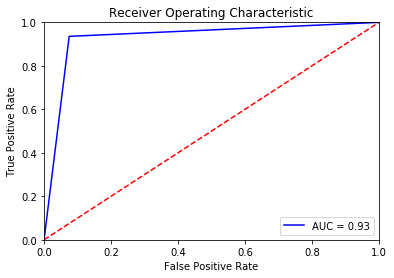

[[296  24]
 [ 18 262]]


In [7]:
# Prediction #
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = (y_pred>0.5)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Creating the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

---

**Classification Report**

In [6]:
from sklearn.metrics import classification_report

target_names = ['Class 1', 'Class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Class 1       0.94      0.93      0.93       320
    Class 2       0.92      0.94      0.93       280

avg / total       0.93      0.93      0.93       600



---

# Pending #
1. 